In [ ]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

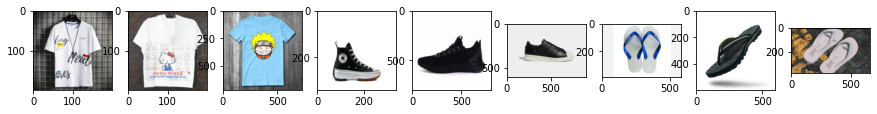

(9, 480, 480, 3)


In [ ]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://img.priceza.co.id/img1/2130004/0001/2130004-20220419101306-83655190474777613.jpg")
urls.append("http://img.priceza.co.id/img1/2130004/0001/2130004-20190531182124-20374998325676248.jpg")
urls.append("https://www.kibrispdr.org/data/57/desain-baju-kartun-0.jpg")
urls.append("https://www.planetsports.asia/media/catalog/product/cache/144a401d4eb9f312744987a3cea154c3/0/1/01-CONVERSE-FFSSBCON0-Converse-RUN-STAR-HIKE-LUGGED-Unisex-Sneakers-Shoes---BLACK-WHITE-GUM-CON166800C-Black_1.jpg")
urls.append("https://www.ncrsport.com/img/storage/large/E91617H-BXX-1.jpg")
urls.append("https://a.ipricegroup.com/media/Gita/sepatu_Adidas_Superstar_82_pria_black.jpg")
urls.append("https://img.okezone.com/content/2022/11/12/455/2706070/asal-usul-sandal-jepit-swallow-dan-siapa-sosok-di-baliknya-1BvxHoPY25.jpg")
urls.append("https://eagle.co.id/wp-content/uploads/2021/12/Street-2-600x600.jpg")
urls.append("https://thumb.viva.co.id/media/frontend/thumbs3/2019/03/18/5c8f2f20b444d-sandal-jepit_665_374.jpg")
imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [ ]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 610 and np.argmax(yh[i])<=610 ):
      print("Baju")
  elif(np.argmax(yh[i]) >= 770 and np.argmax(yh[i])<=770 ) :
      print("Sepatu")
  elif(np.argmax(yh[i]) >= 774 and np.argmax(yh[i])<=774 ) :
      print("Sandal")
  else:
      print("Lainya")

1/1 [==============================] - 10s 10s/step
Baju
Baju
Baju
Sepatu
Sepatu
Sepatu
Sandal
Sandal
Sandal


In [ ]:
np.argmax(yh[8])

502